<a href="https://colab.research.google.com/github/Aviel26/ComputerVision/blob/main/Image_Dataprocessing_Project_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6"> Is it possible to identify the weather forecast on a photo ?<font size="6">

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import random
import pickle
from google.colab import drive
import glob
import re
import os
import glob
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model,Sequential


In [ ]:
my_images = glob.glob("/content/gdrive/MyDrive/weatherData/*.jpg")

In [ ]:
import os, shutil
original_dataset_dir = '/content/gdrive/MyDrive/weatherData'
base_dir = '/content/gdrive/MyDrive/weather_Project_Image'
os.mkdir(base_dir)

**<font size="5">Build four files for each categorie**

In [ ]:

cloudy_dir = os.path.join(base_dir, 'cloudy')
os.mkdir(cloudy_dir)
rain_dir = os.path.join(base_dir, 'rain')
os.mkdir(rain_dir)
shine_dir = os.path.join(base_dir, 'shine')
os.mkdir(shine_dir)
sunrise_dir = os.path.join(base_dir, 'sunrise')
os.mkdir(sunrise_dir)

/content/gdrive/MyDrive/weather_Project_Image/cloudy


In [ ]:
my_images = glob.glob("/content/gdrive/MyDrive/weatherData/*.jpg")
Cloudy = []
Rain = []
Shine = []
Sunrise = []
for image in my_images :
  # with regex expressiom we put each image in list and after in his true category
  a = re.search("cloudy[0-9]+(.+)", image)   
  b = re.search("rain[0-9]+(.+)", image)
  c = re.search("shine[0-9]+(.+)", image)
  d = re.search("sunrise[0-9]+(.+)", image)
  if a : 
    Cloudy.append(a.group(0))
  if b :
    Rain.append(b.group(0))
  if c :
    Shine.append(c.group(0))
  if d :
    Sunrise.append(d.group(0))



In [ ]:
# copy of each image in his category
for fname in Cloudy:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(cloudy_dir, fname)
  shutil.copyfile(src, dst)


for fname in Rain:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(rain_dir, fname)
  shutil.copyfile(src, dst)

for fname in Shine:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(shine_dir, fname)
  shutil.copyfile(src, dst)

for fname in Sunrise:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(sunrise_dir, fname)
  shutil.copyfile(src, dst)

In [3]:
CATEGORIES = ['cloudy', 'rain', 'shine', 'sunrise']
DATADIR = '/content/gdrive/MyDrive/CNN_Project_weather/weather_Project_Image_final'
IMG_SIZE = 160 # give dimension to the image

In [4]:
training_data = []
def create_dataset():
    
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # directory for the image
        class_num = CATEGORIES.index(category)  # 0 = Cloudy ; 1 = Rainy ; 2 = Shine ; 3 = Sunrise
        

        for img in tqdm(os.listdir(path)):  # for all the image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # Convert images in array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to the same size
                training_data.append([new_array, class_num])  # add image to train_data
            except Exception as e: 
                pass

In [5]:
create_dataset()

100%|██████████| 356/356 [00:08<00:00, 42.03it/s]


In [6]:
# We blend the images
random.shuffle(training_data)

X = []
y = []
# We put features in X and label in y
for features,label in training_data:
    X.append(features)
    y.append(label)


In [7]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)


In [8]:
X.shape

(1120, 160, 160, 3)

In [9]:
# serialization
pickle_out = open("features.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("labels.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
##


In [10]:
pickle_in = open("features.pickle","rb")
features = pickle.load(pickle_in)
features.shape

(1120, 160, 160, 3)

In [11]:
pickle_in = open("labels.pickle","rb")
labels = pickle.load(pickle_in)
labels= np.array(labels)
labels.shape

(1120,)

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'sunrise')

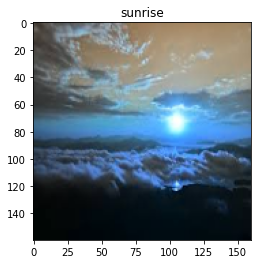

In [13]:
plt.figure()
plt.imshow(features[400])
plt.title(CATEGORIES[labels[400]])

In [14]:
from sklearn.model_selection import train_test_split
# I prefered separate the data with sklearn split because it is more simple that to separate with commanf on files in drive
# I choise 0.3 on the test because I want important auantity of data on the train to train my model good
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0



In [15]:
print('X_train : ', X_train.shape,'\n',
      'y_train : ', y_train.shape,'\n',
      'X_test : ', X_test.shape,'\n',      
      'y_test : ', y_test.shape,'\n')

X_train :  (896, 160, 160, 3) 
 y_train :  (896,) 
 X_test :  (224, 160, 160, 3) 
 y_test :  (224,) 



<h1> Our own model

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(160,160,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add( Dense(4, activation='softmax')) #  layer of 4 neurones because 4 categories

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 160, 160, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                        

In [19]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
28/28 [==============================] - 19s 216ms/step - loss: 14.6093 - accuracy: 0.7467 - val_loss: 14.1387 - val_accuracy: 0.2991
Epoch 2/20
28/28 [==============================] - 5s 187ms/step - loss: 7.3331 - accuracy: 0.8337 - val_loss: 2.5063 - val_accuracy: 0.6384
Epoch 3/20
28/28 [==============================] - 5s 186ms/step - loss: 6.6976 - accuracy: 0.8594 - val_loss: 30.2885 - val_accuracy: 0.3527
Epoch 4/20
28/28 [==============================] - 5s 197ms/step - loss: 5.4572 - accuracy: 0.8984 - val_loss: 39.5486 - val_accuracy: 0.2277
Epoch 5/20
28/28 [==============================] - 6s 198ms/step - loss: 2.7738 - accuracy: 0.9074 - val_loss: 38.2679 - val_accuracy: 0.2991
Epoch 6/20
28/28 [==============================] - 5s 187ms/step - loss: 2.8971 - accuracy: 0.9219 - val_loss: 61.2868 - val_accuracy: 0.2812
Epoch 7/20
28/28 [==============================] - 5s 187ms/step - loss: 3.0095 - accuracy: 0.9118 - val_loss: 22.0022 - val_accuracy: 0.339

7/7 - 1s - loss: 6.0728 - accuracy: 0.8795 - 589ms/epoch - 84ms/step


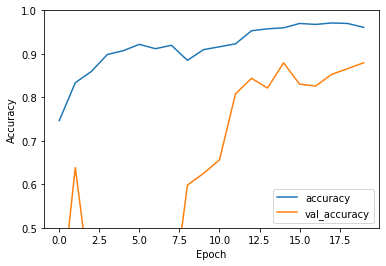

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


> val_accuracy: 0.8795 <b>


```
The progression is not very stable
```





<h1>Transfer Learning

In [79]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

In [80]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [81]:
# We create pooling layer
sortie_conv =  tf.keras.Sequential()
sortie_conv.add(tf.keras.layers.GlobalAveragePooling2D())
sortie_conv.add(Dense(64, activation='relu'))
sortie_conv.add(Dropout(0.3))
sortie_conv.add(Dense(4, activation='softmax')) # four categories

In [82]:
# We freeze the layers of the base-model
base_model.trainable = False

In [83]:
# We combine all that
model2 = tf.keras.Sequential([
  base_model,
  sortie_conv,
  
])

In [84]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 sequential_12 (Sequential)  (None, 4)                 82244     
                                                                 
Total params: 2,340,228
Trainable params: 82,244
Non-trainable params: 2,257,984
_________________________________________________________________


In [86]:
history = model2.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
28/28 [==============================] - 8s 101ms/step - loss: 1.4289 - accuracy: 0.3605 - val_loss: 1.0319 - val_accuracy: 0.5714
Epoch 2/20
28/28 [==============================] - 2s 75ms/step - loss: 0.9718 - accuracy: 0.6116 - val_loss: 0.7291 - val_accuracy: 0.7768
Epoch 3/20
28/28 [==============================] - 2s 65ms/step - loss: 0.7274 - accuracy: 0.7411 - val_loss: 0.5730 - val_accuracy: 0.8393
Epoch 4/20
28/28 [==============================] - 2s 63ms/step - loss: 0.6046 - accuracy: 0.7879 - val_loss: 0.4709 - val_accuracy: 0.8304
Epoch 5/20
28/28 [==============================] - 2s 63ms/step - loss: 0.5045 - accuracy: 0.8315 - val_loss: 0.3997 - val_accuracy: 0.8750
Epoch 6/20
28/28 [==============================] - 2s 63ms/step - loss: 0.4763 - accuracy: 0.8315 - val_loss: 0.3621 - val_accuracy: 0.8750
Epoch 7/20
28/28 [==============================] - 2s 64ms/step - loss: 0.4429 - accuracy: 0.8438 - val_loss: 0.3291 - val_accuracy: 0.8973
Epoch 8/20
2

- val_accuracy: 0.9196

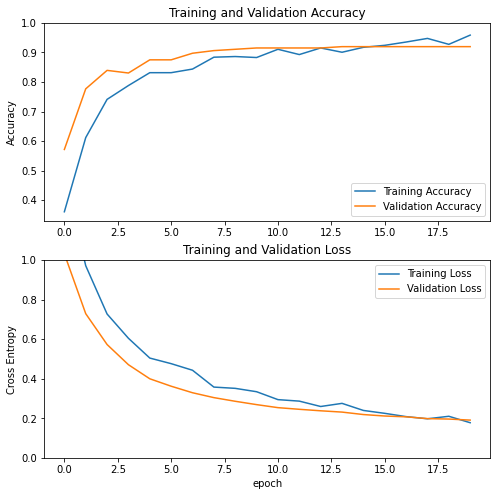

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<h1> Let's see if we can do better with <b>Fine Tuning

In [88]:
# We give the possibility to train the basic model of ImageNet
base_model.trainable = True

# But just the last 100 layers
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [89]:
base_learning_rate = 1e-4
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/1000000),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [90]:
history_fine = model.fit( X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test, y_test),)

Epoch 1/10
7/7 [==============================] - 5s 660ms/step - loss: 4.0173e-07 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.9643
Epoch 2/10
7/7 [==============================] - 4s 651ms/step - loss: 5.7475e-05 - accuracy: 1.0000 - val_loss: 0.3225 - val_accuracy: 0.9643
Epoch 3/10
7/7 [==============================] - 4s 649ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.3345 - val_accuracy: 0.9598
Epoch 4/10
7/7 [==============================] - 5s 653ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.3341 - val_accuracy: 0.9554
Epoch 5/10
7/7 [==============================] - 4s 649ms/step - loss: 0.0054 - accuracy: 0.9978 - val_loss: 0.3340 - val_accuracy: 0.9643
Epoch 6/10
7/7 [==============================] - 4s 645ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.3453 - val_accuracy: 0.9598
Epoch 7/10
7/7 [==============================] - 4s 648ms/step - loss: 0.0292 - accuracy: 0.9989 - val_loss: 0.3413 - val_accuracy: 0.9598
Epoch 8/10
7

<h1>We managed to do a fine tuning and improve the precision of the model